# 1.3 국가별 음주 데이터 분석하기

## 1) 탐색 : 데이터의 기초 정보 살펴보기 

```
country : 국가 정보
beer_servings : beer 소비량
spirit_servings : spirit 소비량
wine_servings : wine 소비량
total_litres_of_pure_alcohol : 총 알코올 소비량
continent : 국가의 대륙 정보
```

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/drinks.csv'
drinks = pd.read_csv(file_path)
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [2]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


- 총 193개의 데이터 
- continent에 23개의 결측 존재

In [3]:
# 연속형 features의 정보
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 2) 인사이트의 발견 : 탐색과 시각화하기

* feature 간의 _상관 관계_ 를 통계적으로 탐색하는 방법은 크게 2가지가 있다.  

|단순 상관 분석|다중 상관 분석|
|:---------------:|:--------------:|
|feature가 2개일 때의 상관 계수 계산하는 방법|대상 feature가 여러 개일때 상호 간의 연관성을 분석하는 방법|  


  
* __상관 분석?__  
: 상관 분석이란 (연속형) 두 변수 간의 _선형적 관계_ 를 _상관 계수_ 로 표현하는 것이다.  
상관 계수를 구하는 것은 공분산의 개념을 포함한다.  
공분산은 2개의 확률 변수에 대한 상관 정도로, 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸 것이다.  
하지만 공분산만으로 두 확률 변수의 상관 관계를 구한다면 두 변수 단위 크기에 영향을 받을 수 있다.  
따라서 이를 -1과 1 사이의 값으로 변환한다. 이를 _상관 계수_ 라 한다.  
만약 상관 계수가 1에 가깝다면 서로 강한 양의 상관 관계가 있는 것이고, -1에 가깝다면 음의 상관 관계가 있는 것이다. 

- 현재 데이터에서 상관 관계를 살펴 볼 대상은 beer_servings, spirit_servings, wine_servings, total_litres_of_pure_alcohol 이렇게 4개의 feature이다. 
- 술의 종류만 다를 뿐, 결국에는 비슷한 의미를 가지는 features이기 때문

### _맥주와 와인 소비량의 상관 관계 알아보기_

In [4]:
# beer_servings, wine_servings 두 feature 간의 상관 계수 matrix 형태로 출력
# pearson은 상관 계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


- 두 featuers 간의 상관 관계는 0.52 정도

### _여러 feature의 상관 관계 분석하기_

In [5]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr # 상관 계수 행렬 출력

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


#### _heatmap 그래프_

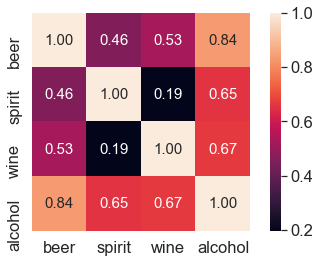

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 heatmap 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력 위한 cols 이름 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols_view,
                 xticklabels=cols_view)
plt.tight_layout()
plt.show()

#### _pairplot 그래프_

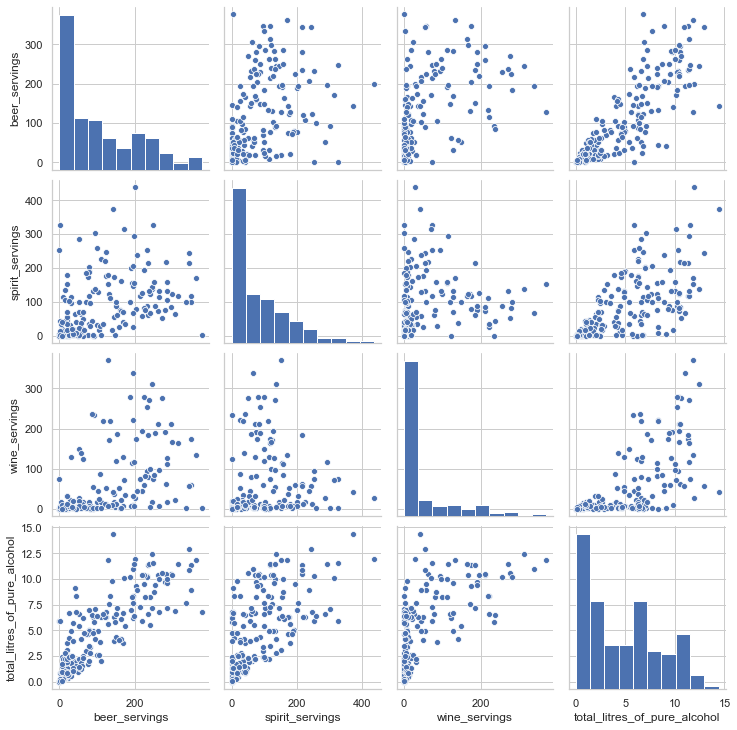

In [7]:
# 시각화 라이브러리 이용한 feature 간의 산점도 그래프 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

- 'total_litres_of_pure_alcohol'가 대체적으로 모든 fearure와 상관 관계가 있는 것으로 보이며
- 특히 'beer_servings'와의 상관성이 매우 높은 것으로 나타남  
=> <span style="color:blue">대부분 국가의 총 알코올 소비량은 맥주 소비량에 영향을 받을 확률이 높음. / 대부분의 국가에서는 맥주가 가장 많이 소비되는 술이라는 해석도 가능함</span>

## 3) 탐색적 분석 : 스무고개로 개념적 탐색 분석하기

### _전처리_

In [8]:
# 결측 있는 'continent' 기타 대륙(OTher)로 채워주기
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


#### _(전처리 후) 시각화_
: 전체 대륙 중에서 OT가 차지하는 비율 파이차트로 확인

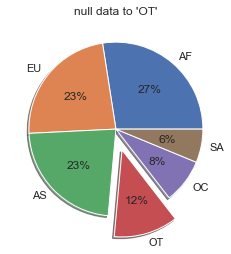

In [9]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0) # pie가 튀어나오는지 정해줌 

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True) # pi 위에 표시될 글자 형태, 알아서 %로 변환해서 알려줌 
plt.title('null data to \'OT\'')
plt.show()

### _대륙별 'spirit_servings'의 통계적 정보는 어느 정도일까?_

In [10]:
result = drinks.groupby('continent')['spirit_servings'].agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


(참고)
- agg()  
: apply() 함수와 거의 동일한 기능을 하지만,  
apply()에 들어가는 함수 파라미터를 병렬로 설정하여 __그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수__ 이다.  
대륙별 'spirit_servings'의 통계적 정보를 구하기 위해서는 agg에 ['mean', 'min', 'max', 'sum'] 파라미터를 입력하는 것만으로도 간단히 탐색이 가능함

### _전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?_

In [11]:
total_mean = drinks.total_litres_of_pure_alcohol.mean() # 전체 평균
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean() # 대륙별 평균
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### _평균 beer_servings가 가장 높은 대륙은 어디일까?_

In [12]:
drinks.groupby('continent')['beer_servings'].mean().idxmax()
# idxmax()는 series 객체에서 값이 가장 큰 index를 반환하는 기능

'EU'

=> 위의 2가지 질문에 대한 탐색을 통해 
- EU, OT, SA 대륙이 평균보다 알코올을 많이 섭취하는 대륙인 것을 알 수 있었다.
- 또한, <span style="color:blue">맥주를 가장 좋아하는 대륙은 유럽(EU)이라는 결과를 확인할 수 있었다.</span>


### _시각화_

#### _대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화_

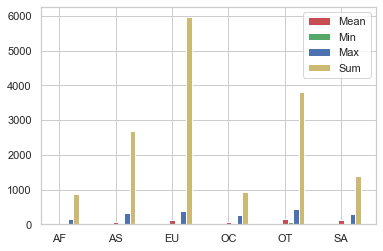

In [13]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

#### _대륙별 total_litres_of_pure_alcohol을 시각화_

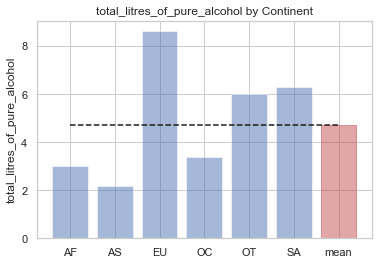

In [14]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], 'k--') # 점선 그리기 
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

#### _대륙별 beer_servings 시각화_

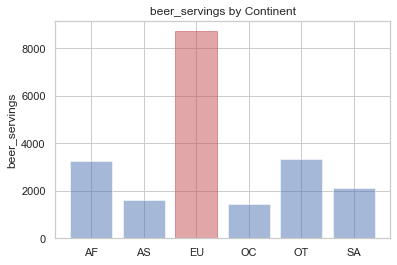

In [15]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index('EU')].set_color('r') # EU만 red로 설정
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

## 4) 통계적 분석 : 분석 대상 간의 통계적 차이 검정하기
: 지금까지는 두 feature 간의 상관성을 계산하거나 혹은 그룹 단위로 나누어 수치 정보를 살펴보는 방식의 데이터 분석을 알아보았다.  
이러한 분석은 데이터에서 인사이트를 발견하는 데 있어서 매우 유용한 방법이다.  
하지만 이는 분석가의 주관에 따라 도출된 내용이기 때문에 분석 자체의 __타당성__을 증명하기에는 한계가 있다.  
따라서 분석 결과에 __타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정이 필요하다.__  
그 중 가장 기본적인 방법인 t-test를 통해 분석 대상 간에 통계적 차이를 검정하는 방법을 알아본다.

- t-test?  
: 두 집단 간 평균의 차이에 대한 검정 방법  
__모집단의 평균__ 등과 같이 실제 정보를 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법이다.  
단, t-test는 검정 대상인 두 집단의 __데이터 개수가 비슷__하면서 두 데이터가 __정규 분포__를 보이는 경우에 신뢰도가 높은 검정 방식이다.

### _아프리카와 유럽 간의 맥주 소비량 차이 검정하기_

In [16]:
africa = drinks.loc[drinks['continent']=='AF']
africa.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF


In [17]:
europe = drinks.loc[drinks['continent']=='EU']
europe.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [18]:
from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings']) # 두 집단의 분산이 같은 경우 가정
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False) # 두 집단의 분산이 같지 않은 경우 가정

print('The t-statistic and p-value assuming equal variances is %.3f and %.3f.' % tTestResult)
print('The t-statistic and p-value not assuming equal variances is %.3f and %.3f' % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


- 등분산을 가정한 케이스와 가정하지 않은 케이스 모두 p-value가 0.000 이하로 나타남.  
    => t-test의 귀무 가설은 '두 집단의 평균이 같다'이고 이 귀무 가설은 기각  
    => <span style="color:blue">__'아프리카와 유럽 대륙 간의 맥주 소비량 차이'는 통계적으로 유의하다는 결론 도출__</span>  
    => 하지만, 두 집단의 데이터는 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정이라고 보기엔 어렵다.(그룹 간의 데이터 크기가 매우 다르고 , 정규분포를 띤다는 가정을 할 수 없기 때문에 신뢰 x)  
    => 만약 통계적 분석을 하기에 좋은 조건인 경우라면 이러한 방법을 사용할 수 있다는 것만 알아두자!

(참고)
- t-statistic : t-test의 검정 통계량을 의미, 함께 출력되는 p-value와 연관 지어 해석해야 한다. 
- p-value : 가설이 얼마나 믿을만한 것인지를 나타내는 지표, 데이터를 새로 sampling했을 때 __귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률__이라고 정의할 수 있다. 
    - 만약 p-value가 너무 낮으면 => 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 됨
    - 보통 p-value의 기준은 0.05나 0.01을 기준으로 하며, 이를 __p-value(유의확률)__라고 한다. 
- 귀무 가설 : 처음부터 버릴 것을 예상하는 가설, 가설이 맞지 않다는 것을 증명하기 위해 수립하는 가설
- 대립 가설 : 귀무 가설과 반대되는 것, 귀무 가설이 거짓인 경우에 대안적으로 참이 되는 가설

### _대한민국은 얼마나 독하게 술을 마시는 나라일까?_

In [19]:
# total_servings(모든 술의 총 소비량) feature 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# '술 소비량 대비 알콜 비율' feature 생성 -> 술을 독하게 마시는 정도의 국가별 차이를 관찰 가능함.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [20]:
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank.head()

,country,alcohol_rate
0,Afghanistan,0.000000
1,Albania,0.017818
2,Algeria,0.017949
3,Andorra,0.017842
4,Angola,0.018495


In [21]:
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=False)
country_with_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


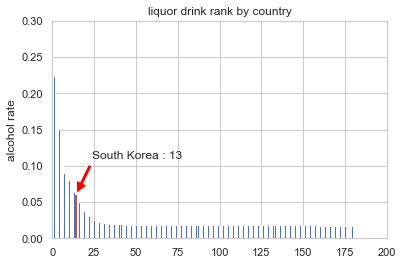

In [22]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

# 한국 순위
korea_rank = country_list.index('South Korea')
# 한국의 술 소비량 대비 알콜 비율
korea_alc_rate = country_with_rank[country_with_rank['country']=='South Korea']['alcohol_rate'].values[0]
# 화살표, 주석
plt.annotate('South Korea : ' + str(korea_rank - 1),
            xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()